In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
clean_df = pd.read_csv('../data/clean_df.csv')

In [6]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65154 entries, 0 to 65153
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             65154 non-null  int64  
 1   year           65154 non-null  int64  
 2   date           65154 non-null  object 
 3   time           65154 non-null  object 
 4   timezone       65154 non-null  object 
 5   datetime_utc   65154 non-null  object 
 6   state          65154 non-null  object 
 7   state_fips     65154 non-null  int64  
 8   magnitude      64857 non-null  float64
 9   injuries       65154 non-null  int64  
 10  fatalities     65154 non-null  int64  
 11  prop_loss      39872 non-null  float64
 12  start_lat      65154 non-null  float64
 13  start_lon      65154 non-null  float64
 14  end_lat        65154 non-null  float64
 15  end_lon        65154 non-null  float64
 16  length(m)      65154 non-null  float64
 17  width(m)       65154 non-null  float64
 18  num_of

In [7]:
clean_df.head(5)

,id,year,date,time,timezone,datetime_utc,state,state_fips,magnitude,injuries,...,length(m),width(m),num_of_states,state_num,f1,f2,f3,f4,mag_estimated,tempc
0,192,1950,1950-10-01,21:00:00,America/Chicago,1950-10-02T03:00:00Z,OK,40,1.0,0,...,25427.572,9.1440,1,1,25,0,0,0,False,10.773611
1,193,1950,1950-10-09,02:15:00,America/Chicago,1950-10-09T08:15:00Z,NC,37,3.0,3,...,3218.680,804.6720,1,1,47,0,0,0,False,10.773611
2,195,1950,1950-11-20,02:20:00,America/Chicago,1950-11-20T08:20:00Z,KY,21,2.0,0,...,160.934,9.1440,1,1,177,0,0,0,False,10.773611
3,196,1950,1950-11-20,04:00:00,America/Chicago,1950-11-20T10:00:00Z,KY,21,1.0,0,...,160.934,9.1440,1,1,209,0,0,0,False,10.773611
4,197,1950,1950-11-20,07:30:00,America/Chicago,1950-11-20T13:30:00Z,MS,28,1.0,3,...,3218.680,33.8328,1,1,101,0,0,0,False,10.773611


In [8]:
clean_df.tail(5)

,id,year,date,time,timezone,datetime_utc,state,state_fips,magnitude,injuries,...,length(m),width(m),num_of_states,state_num,f1,f2,f3,f4,mag_estimated,tempc
65149,618356,2019,2019-09-09,15:32:00,America/Chicago,2019-09-09T20:32:00Z,IA,19,NaN,0,...,2204.7958,9.144,1,1,49,0,0,0,False,11.484259
65150,618357,2019,2019-09-09,15:33:00,America/Chicago,2019-09-09T20:33:00Z,IA,19,NaN,0,...,4602.7124,9.144,1,1,49,0,0,0,False,11.484259
65151,618358,2019,2019-09-09,17:55:00,America/Chicago,2019-09-09T22:55:00Z,SD,46,0.0,0,...,160.9340,9.144,1,1,37,0,0,0,False,11.484259
65152,618359,2019,2019-09-09,19:03:00,America/Chicago,2019-09-10T00:03:00Z,SD,46,1.0,0,...,2510.5704,73.152,1,1,37,0,0,0,False,11.484259
65153,618360,2019,2019-09-09,19:14:00,America/Chicago,2019-09-10T00:14:00Z,SD,46,0.0,0,...,305.7746,9.144,1,1,37,0,0,0,False,11.484259


In [10]:
clean_df.sample(5)

,id,year,date,time,timezone,datetime_utc,state,state_fips,magnitude,injuries,...,length(m),width(m),num_of_states,state_num,f1,f2,f3,f4,mag_estimated,tempc
33109,1011,1994,1994-10-17,14:24:00,America/Chicago,1994-10-17T19:24:00Z,NE,31,0.0,0,...,160.9340,9.144,1,1,3,0,0,0,False,11.592130
48026,1129,2005,2005-08-29,20:25:00,America/Chicago,2005-08-30T01:25:00Z,GA,13,0.0,0,...,482.8020,45.720,1,1,297,0,0,0,False,12.020833
52409,268,2009,2009-04-11,18:55:00,America/Chicago,2009-04-11T23:55:00Z,TX,48,0.0,0,...,1174.8182,274.320,1,1,173,0,0,0,False,11.327778
1225,73,1954,1954-03-25,02:00:00,America/Chicago,1954-03-25T08:00:00Z,MO,29,1.0,0,...,1609.3400,54.864,1,1,183,0,0,0,False,11.848611
40173,469,1999,1999-06-04,17:15:00,America/Chicago,1999-06-04T22:15:00Z,NE,31,0.0,0,...,160.9340,27.432,1,1,165,0,0,0,False,12.153241


In [11]:
clean_df.describe()

,id,year,state_fips,magnitude,injuries,fatalities,prop_loss,start_lat,start_lon,end_lat,end_lon,length(m),width(m),num_of_states,state_num,f1,f2,f3,f4,tempc
count,65154.000000,65154.000000,65154.000000,64857.000000,65154.000000,65154.000000,3.987200e+04,65154.000000,65154.000000,65154.000000,65154.000000,65154.000000,65154.000000,65154.000000,65154.000000,65154.000000,65154.000000,65154.000000,65154.000000,65154.000000
mean,85656.931056,1990.269991,29.332366,0.782845,1.466203,0.091046,2.018579e+06,37.138837,-92.871770,22.199139,-54.997770,5571.823879,95.629295,1.008472,0.991697,105.113823,8.408248,1.666452,0.512432,11.483932
std,198544.489428,18.837397,14.999123,0.901440,18.453924,1.489556,2.998601e+07,5.104265,8.696028,18.690318,45.808431,13365.642278,185.930492,0.093479,0.090745,97.163223,37.598325,16.612794,9.286352,0.555954
min,1.000000,1950.000000,1.000000,0.000000,0.000000,0.000000,5.000000e+01,17.721200,-163.530000,0.000000,-163.530000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.490741
25%,269.000000,1975.000000,18.000000,0.000000,0.000000,0.000000,6.000000e+03,33.204175,-98.520000,0.000000,-94.670000,160.934000,15.544800,1.000000,1.000000,39.000000,0.000000,0.000000,0.000000,11.044907
50%,555.000000,1993.000000,28.000000,1.000000,0.000000,0.000000,5.000000e+04,37.050000,-93.750000,32.200000,-83.800000,1158.724800,45.720000,1.000000,1.000000,85.000000,0.000000,0.000000,0.000000,11.418519
75%,988.000000,2006.000000,45.000000,1.000000,0.000000,0.000000,5.000000e+05,40.930000,-86.820000,38.450000,0.000000,4828.020000,91.440000,1.000000,1.000000,137.000000,0.000000,0.000000,0.000000,11.844907
max,618541.000000,2019.000000,78.000000,5.000000,1740.000000,158.000000,2.800100e+09,61.020000,-64.715100,61.020000,0.000000,377712.098000,4184.294400,3.000000,1.000000,810.000000,810.000000,710.000000,507.000000,12.935648


In [12]:
clean_df.isnull().sum()

id                   0
year                 0
date                 0
time                 0
timezone             0
datetime_utc         0
state                0
state_fips           0
magnitude          297
injuries             0
fatalities           0
prop_loss        25282
start_lat            0
start_lon            0
end_lat              0
end_lon              0
length(m)            0
width(m)             0
num_of_states        0
state_num            0
f1                   0
f2                   0
f3                   0
f4                   0
mag_estimated        0
tempc                0
dtype: int64

In [171]:
def fig_size(height, width):
    plt.figure(figsize=(height, width))

def lineplot(df,x1,y1):
    sns.lineplot(data=df,x=x1, y=y1)

def regplot(df,x1,y1):
    sns.regplot(data=df,x=x1, y=y1)

def barplot(df,x1,y1):
    sns.barplot(data=df,x=x1, y=y1)

def histplot(df,x1):
    sns.histplot(data=df,x=x1)

<Axes: >

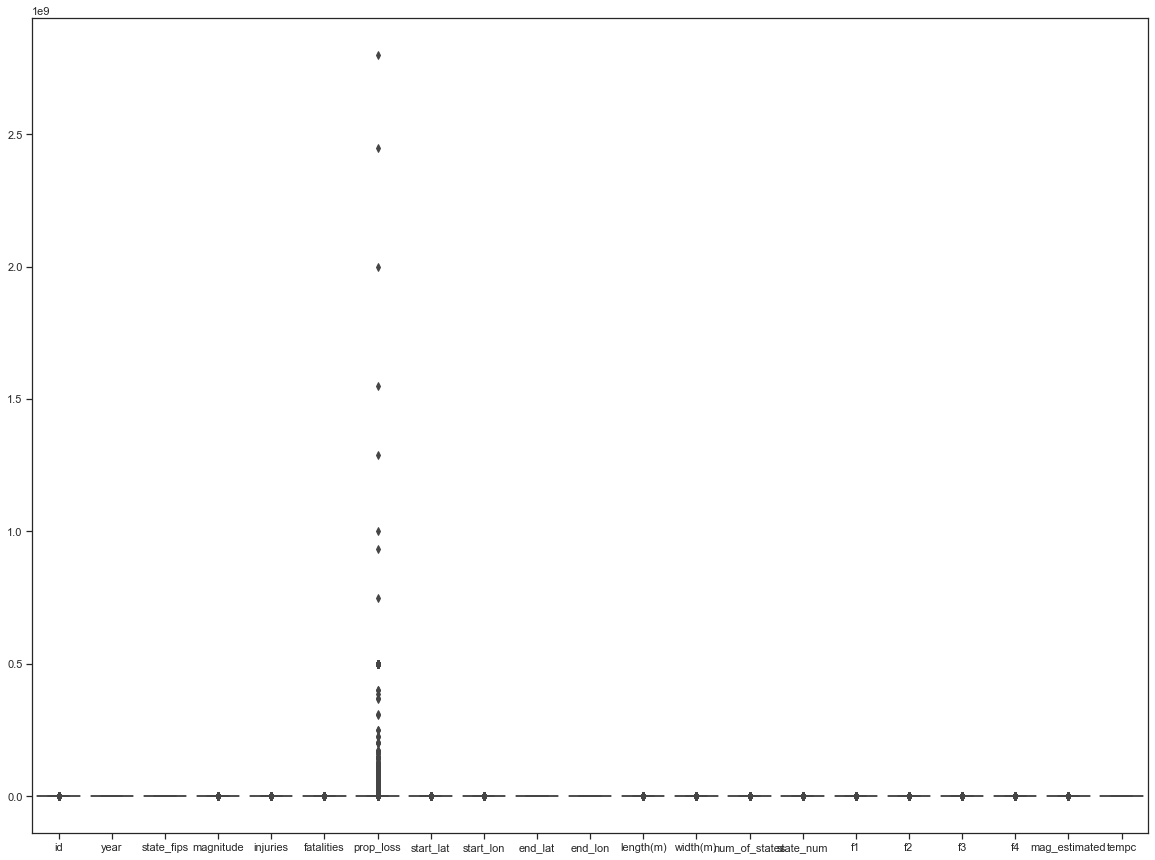

In [150]:
fig_size(20,15)#probably doesnt need to be this big
sns.boxplot(data=clean_df)

Appears to be several outliers in the prop_loss column, a strong tornado could cause a large amount of damage,
so there may be no reason to remove them.

<Axes: xlabel='magnitude', ylabel='prop_loss'>

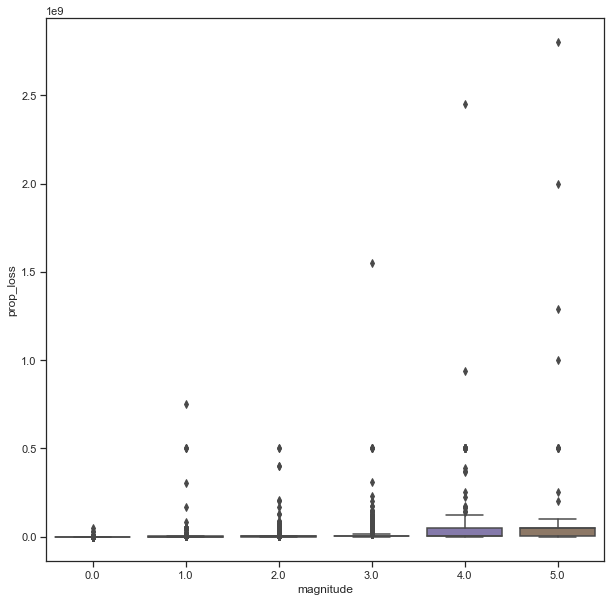

In [151]:
fig_size(10,10)
sns.boxplot(data=clean_df,y='prop_loss', x='magnitude')

In [50]:
corr = clean_df[['year','magnitude','injuries','fatalities','prop_loss','length(m)','width(m)','tempc']].corr()

In [52]:
corr

,year,magnitude,injuries,fatalities,prop_loss,length(m),width(m),tempc
year,1.000000,-0.296112,-0.041714,-0.034384,0.021679,-0.070949,0.104361,0.636711
magnitude,-0.296112,1.000000,0.221748,0.195629,0.148810,0.439056,0.418881,-0.183591
injuries,-0.041714,0.221748,1.000000,0.759505,0.538393,0.251375,0.185544,-0.023029
fatalities,-0.034384,0.195629,0.759505,1.000000,0.489390,0.229919,0.171601,-0.011146
prop_loss,0.021679,0.148810,0.538393,0.489390,1.000000,0.152700,0.185632,0.007849
length(m),-0.070949,0.439056,0.251375,0.229919,0.152700,1.000000,0.365089,-0.026230
width(m),0.104361,0.418881,0.185544,0.171601,0.185632,0.365089,1.000000,0.075534
tempc,0.636711,-0.183591,-0.023029,-0.011146,0.007849,-0.026230,0.075534,1.000000


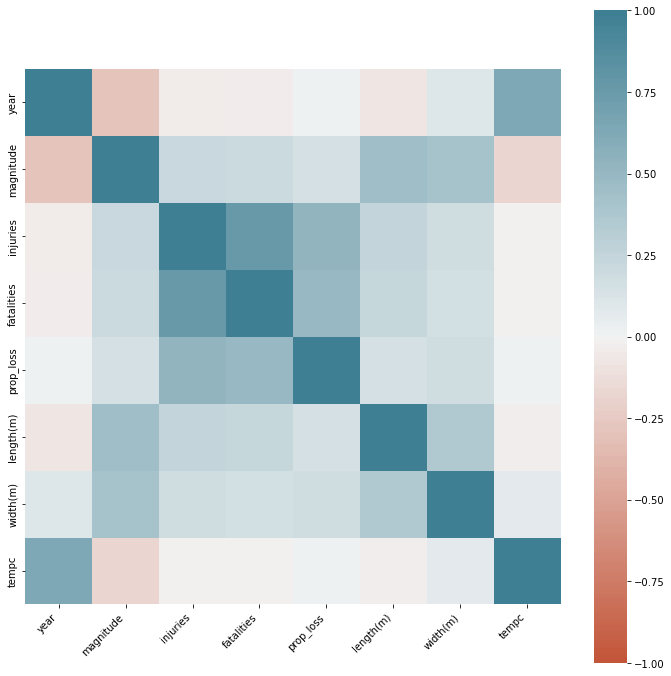

In [63]:
fig_size(12,12)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

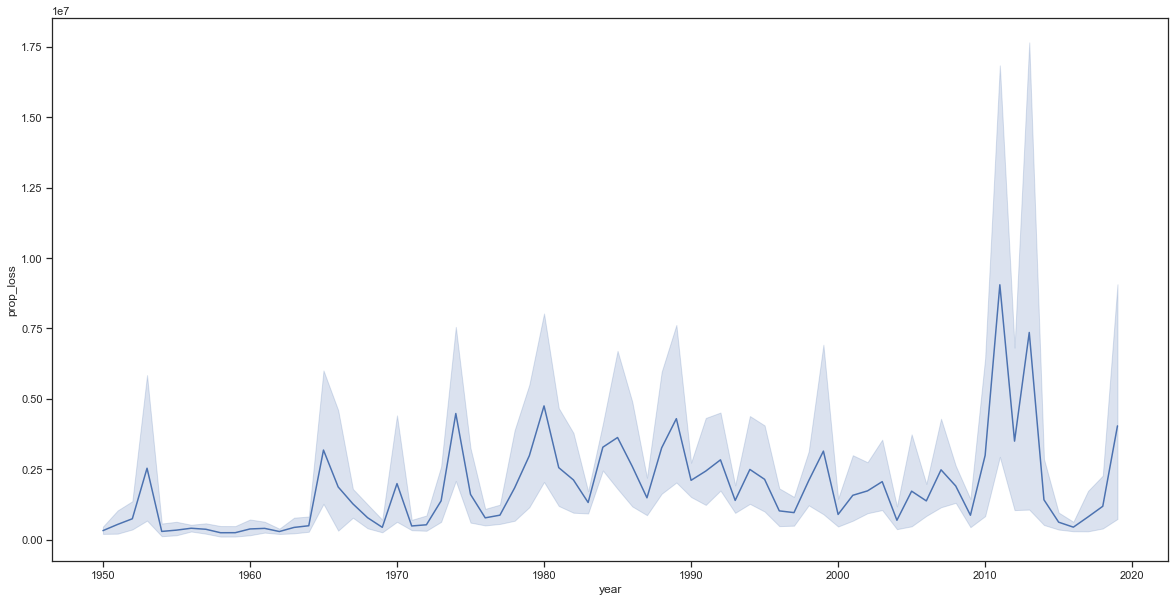

In [172]:
fig_size(20,10)
lineplot(clean_df,'year','prop_loss')

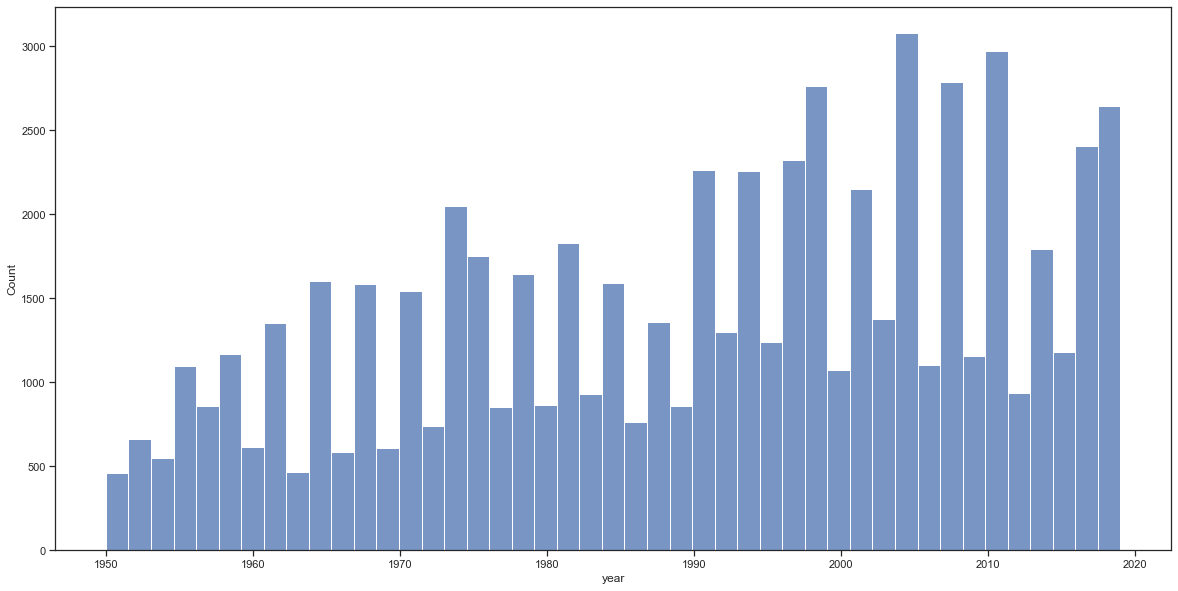

In [211]:
fig_size(20,10)
histplot(clean_df,'year')

<Axes: xlabel='state', ylabel='Count'>

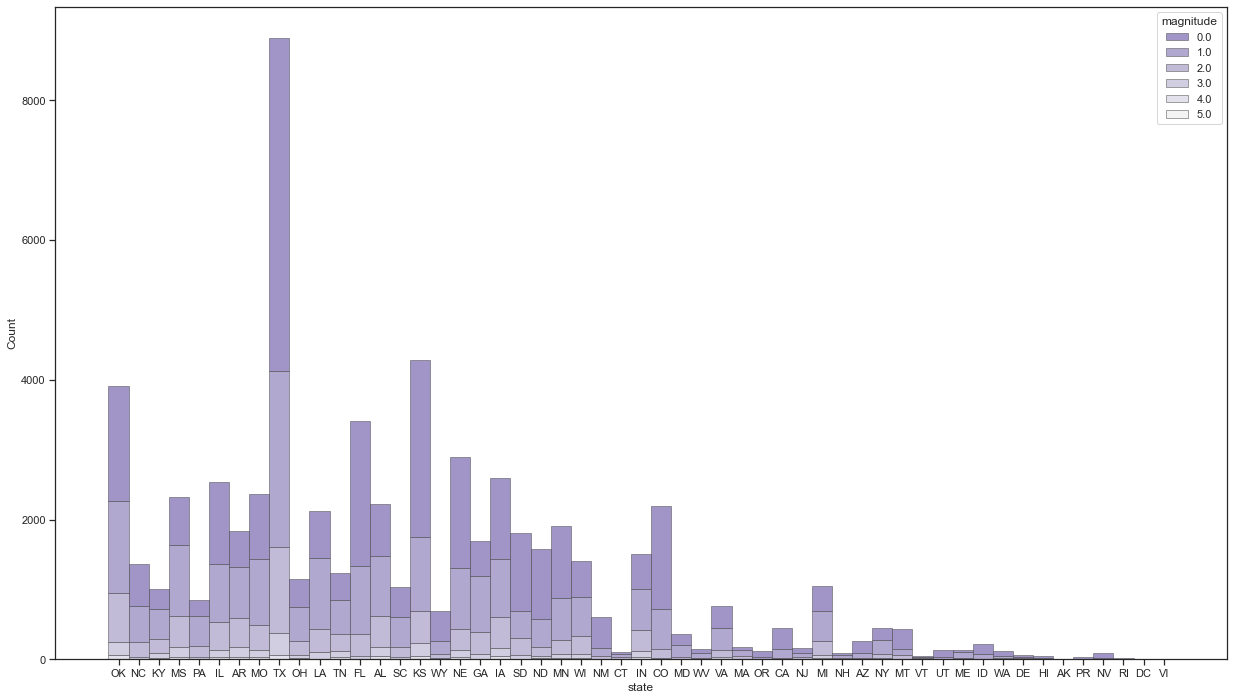

In [175]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(21, 12))
sns.histplot(
    clean_df,
    x=clean_df['state'], hue="magnitude",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5)

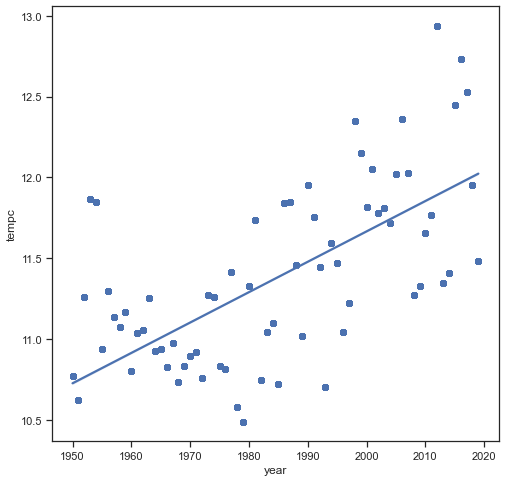

In [185]:
fig_size(8,8)
regplot(clean_df, 'year', 'tempc')

(None, None, None)

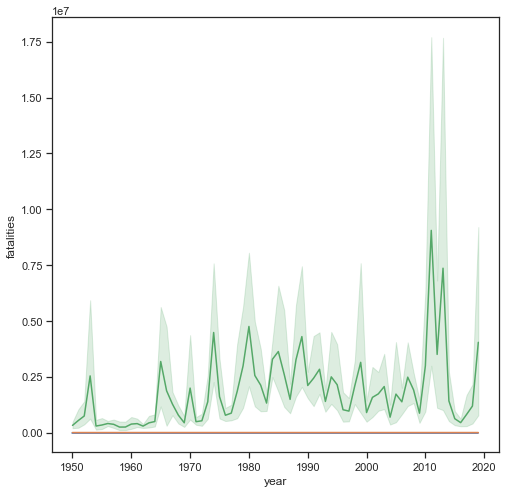

In [222]:
fig_size(8,8)

lineplot(clean_df, 'year', 'fatalities'), 

In [203]:
clean_df['year']

0        1950
1        1950
2        1950
3        1950
4        1950
         ... 
65149    2019
65150    2019
65151    2019
65152    2019
65153    2019
Name: year, Length: 65154, dtype: int64